In [1]:
# Download dependencies here


In [52]:
# Importing the libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
pd.set_option('display.max_columns', None)  

In [54]:
%store -r df

In [55]:
X = df.drop(columns=['Overall'])
y = df['Overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
poly = PolynomialFeatures(degree=1)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

In [65]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Testing RMSE: {rmse}")
print(f"Testing R²: {r2}")

Testing RMSE: 0.23225502539712226
Testing R²: 0.8555086965567426


The best degree is: 1


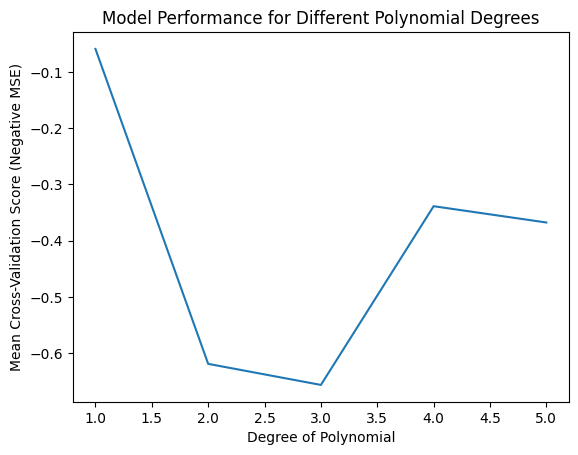

In [63]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming X_train and y_train are already defined
# List of degrees to test
degrees = [1, 2, 3, 4, 5]

# To store cross-validation results
scores = []

# Loop through each degree
for degree in degrees:
    # Transform the features to polynomial features
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X_train)  # Apply transformation to training data
    
    # Initialize the linear regression model
    model = LinearRegression()
    
    # Perform cross-validation with 5 folds
    score = cross_val_score(model, X_poly, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Append the mean score for this degree (negative MSE, so we negate it to get positive MSE)
    scores.append(np.mean(score))

# Find the degree with the best performance (lowest MSE)
best_degree = degrees[np.argmax(scores)]

print(f"The best degree is: {best_degree}")

# Optional: Plot the performance for each degree
plt.plot(degrees, scores)
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Cross-Validation Score (Negative MSE)')
plt.title('Model Performance for Different Polynomial Degrees')
plt.show()